In [1]:
#import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read the data
hr_data=pd.read_csv('hr_data.csv')

In [3]:
#check the first 5 records
hr_data.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [4]:
#Perform some EDA on the columns
hr_data['salary'].describe()

count     14999
unique        3
top         low
freq       7316
Name: salary, dtype: object

In [5]:
hr_data['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [6]:
#Understand the shape of the data
len(hr_data)
hr_data.shape

(14999, 9)

In [7]:
#Read the satisfaction evaluation data
employee_satisfaction=pd.read_excel('employee_satisfaction_evaluation.xlsx')
len(employee_satisfaction)

14999

In [54]:
#check the head of the dataset
employee_satisfaction.head()


,employee_id,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [9]:
#check the columns of the dataset
employee_satisfaction.columns

Index(['EMPLOYEE #', 'satisfaction_level', 'last_evaluation'], dtype='object')

In [10]:
#rename the columns to match the hr_data initially loaded
employee_satisfaction.columns=['employee_id', 'satisfaction_level', 'last_evaluation']

In [11]:
#combine the two datasets using pd.merge 
combinedData=pd.merge(employee_satisfaction,hr_data)

In [12]:
#check the head of resulting dataset
combinedData.head()

,employee_id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,0.38,0.53,2,157,3,0,1,0,sales,low
1,1005,0.80,0.86,5,262,6,0,1,0,sales,medium
2,1486,0.11,0.88,7,272,4,0,1,0,sales,medium
3,1038,0.72,0.87,5,223,5,0,1,0,sales,low
4,1057,0.37,0.52,2,159,3,0,1,0,sales,low


In [13]:
#Perform some EDA on the new dataset
combinedData['time_spend_company'].value_counts()

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64

In [14]:
#Plot an histogram of time spend 
plt.hist(combinedData['time_spend_company'],bins=50)

In [15]:
#checking the size of the missing values
combinedData[combinedData.isnull().any(axis=1)].shape

(43, 11)

In [16]:
#fill the missing with the mean
combinedData.fillna(combinedData.mean(),inplace=True)

In [17]:
combinedData.head()

,employee_id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,0.38,0.53,2,157,3,0,1,0,sales,low
1,1005,0.80,0.86,5,262,6,0,1,0,sales,medium
2,1486,0.11,0.88,7,272,4,0,1,0,sales,medium
3,1038,0.72,0.87,5,223,5,0,1,0,sales,low
4,1057,0.37,0.52,2,159,3,0,1,0,sales,low


In [18]:
#drop the column not required in the modelling ie employee_id
combinedDataFinal=combinedData.drop(columns='employee_id')
combinedDataFinal.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [19]:
combinedDataFinal.groupby('department').sum()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
department,,,,,,,,
IT,758.17283,879.452250,4683,248119,4256,164,273,3
RandD,487.80000,560.446125,3033,158030,2650,134,121,27
accounting,446.68283,550.706125,2934,154292,2702,96,204,14
hr,442.53566,524.006125,2701,146828,2480,89,215,15
management,391.76566,456.234499,2432,126787,2711,103,91,69
marketing,530.62283,613.946125,3164,171073,3063,138,203,43
product_mng,559.19566,644.662250,3434,180369,3135,132,198,0
sales,2543.77981,2938.236749,15634,831773,14631,587,1014,100
support,1377.90849,1611.534499,8479,447490,7563,345,555,20


In [20]:
#Plot the correlation of the numeric variables in the data
corr=combinedDataFinal.corr()

([<matplotlib.axis.YTick at 0x1ded8685188>,
 <a list of 8 Text yticklabel objects>)

<Figure size 432x288 with 0 Axes>

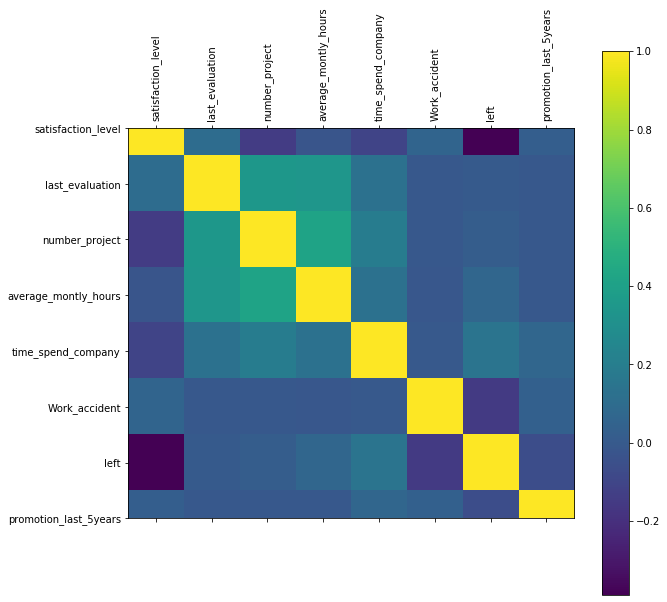

In [21]:
fig = plt.figure()
fig, axes=plt.subplots(figsize=(10,10))
plt.colorbar(axes.matshow(corr))
plt.xticks(range(len(corr.columns)),corr.columns,rotation='vertical')
plt.yticks(range(len(corr.columns)),corr.columns)

In [22]:
#Data Preparation

In [23]:
#1,perform Hot encoding on  Categorical Value
categories=['salary','department']
combinedDataFinal=pd.get_dummies(combinedDataFinal,columns=categories,drop_first=True)

In [24]:
combinedDataFinal.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_low,salary_medium,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
14994,0.40,0.57,2,151,3,0,1,0,1,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,1,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,1,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,1,0,0,0,0,0,0,0,0,1,0
14998,0.37,0.52,2,158,3,0,1,0,1,0,0,0,0,0,0,0,0,1,0


In [25]:
#check the size of the new data
len(combinedDataFinal.columns)

19

In [26]:
#Check the number of the employee who left
len(combinedDataFinal[combinedDataFinal['left']==1])

3571

In [27]:
#Split train and Test data

In [28]:
X=combinedDataFinal.drop('left',axis=1)
y=combinedDataFinal['left']
len(X.columns)
len(y)

14999

In [29]:
#import the required libraries
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [31]:
y_train.shape

(10499,)

In [32]:
#Data Normalization
#This ensures all the variables are equally treated during the modelling

In [33]:
#import the StandardScaler
from sklearn.preprocessing import StandardScaler
#create an instance of the StandardScaler
sc=StandardScaler()

In [62]:
#Fit and scale(transform) the data
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [63]:
#Convert the X_test and X_train to a dataset for easier understanding of the data
df_X_train=pd.DataFrame(X_train)
df_X_test=pd.DataFrame(X_test)

In [58]:
df_X_train.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.116143,0.006892,0.968923,0.723057,1.015386,-0.412864,-0.151642,-0.978421,1.156627,-0.232174,-0.231261,-0.226421,-0.215273,-0.246848,-0.250303,1.605357,-0.410016,-0.471418
1,1.478637,-0.612599,0.968923,0.763057,-0.347854,-0.412864,-0.151642,1.022055,-0.864583,-0.232174,-0.231261,-0.226421,-0.215273,-0.246848,-0.250303,-0.622914,-0.410016,-0.471418
2,0.471709,1.313739,0.157442,0.243059,-0.347854,2.422102,-0.151642,-0.978421,1.156627,-0.232174,-0.231261,-0.226421,-0.215273,4.051083,-0.250303,-0.622914,-0.410016,-0.471418
3,-1.300485,0.321383,-0.654039,-0.976937,-0.347854,2.422102,-0.151642,1.022055,-0.864583,-0.232174,-0.231261,-0.226421,-0.215273,-0.246848,-0.250303,-0.622914,-0.410016,2.121259
4,1.398083,0.554878,-0.654039,0.923056,-0.347854,-0.412864,-0.151642,1.022055,-0.864583,4.307112,-0.231261,-0.226421,-0.215273,-0.246848,-0.250303,-0.622914,-0.410016,-0.471418


In [37]:
#Modelling

In [38]:
# 1. Using Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [40]:
logModel=LogisticRegression(solver='lbfgs')
logModel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
predicted=logModel.predict(X_test)

In [64]:
print(accuracy_score(predicted,y_test)*100)

79.62222222222223


In [43]:
print(confusion_matrix(predicted,y_test))

[[3200  685]
 [ 232  383]]


In [44]:
print(classification_report(predicted,y_test))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      3885
           1       0.36      0.62      0.46       615

    accuracy                           0.80      4500
   macro avg       0.65      0.72      0.66      4500
weighted avg       0.85      0.80      0.82      4500



In [45]:
# 2. RandomForest Classfier    

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
rfc_Predictions=rfc.predict(X_test)

In [ ]:
#EVALUATE THE MODEL PERFRMANCE

In [49]:
print(accuracy_score(rfc_Predictions,y_test))

0.9855555555555555


In [50]:
print(confusion_matrix(rfc_Predictions,y_test))

[[3421   54]
 [  11 1014]]


In [52]:
print(classification_report(rfc_Predictions,y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3475
           1       0.95      0.99      0.97      1025

    accuracy                           0.99      4500
   macro avg       0.97      0.99      0.98      4500
weighted avg       0.99      0.99      0.99      4500



In [ ]:
#From the above two algorithms, it can be seen that, Random Forest Classfied outperform the logistic
#regression in the binary classification problem presented